<a href="https://colab.research.google.com/github/mrella/finance/blob/main/descorrelacion_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENTORNO

In [69]:
!pip install yfinance

In [70]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

sns.set_theme(style="darkgrid", palette="muted", font_scale=1.1)

fecha_inicio = f"{datetime.now().year-1}-01-01"
fecha_train = (datetime.now() - timedelta(days=180)).strftime("%Y-%m-%d")
fecha_fin = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")

#DATOS

In [71]:
#df = yf.download(['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'META', 'NVDA', 'BRK-A', 'JPM', 'V',
#                  'SEDG', 'ALK', 'SEE', 'ZION', 'MHK', 'WHR', 'CMA', 'CTLT', 'XRAY', 'XOM',
#                  'UNH', 'LLY', 'JNJ', 'AVGO', 'PG', 'MA', 'HD', 'CVX', 'MRK', 'ABBV'], progress=False)['Adj Close']


#df = yf.download(['MSFT', 'GOOG', 'META', 'BRK-A', 'NGD', 'BABA','LLY', 'JNJ', 'AVGO', 'PG', 'MA', 'HD', 'CVX', 'MRK', 'ABBV',
#                  'SPY', 'MSFT', 'TSLA', 'V', 'REIT', 'TLT', 'BILL'], start='2018-01-01', end='2023-12-10', progress=False)['Adj Close']

# Read and print the stock tickers that make up S&P500
#tickers = pd.read_html(
#    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
#print(tickers.head())

# Get the data for this tickers from yahoo finance
#df = yf.download(tickers.Symbol.to_list(), start='2018-01-01', end='2023-12-10', progress=True)['Adj Close']
#print(df.head())




#df = yf.download(['SPY', 'IYW', 'ABBV', 'LLY', 'PG', 'BRK-A','HD', 'JNJ', 'AVGO', 'REIT'], start='2018-01-01', end='2024-01-25', progress=False)['Adj Close']
df = yf.download(['SPY','MOAT', 'BABA',  'IYW','KWEB','REIT', 'NGD', 'BRK-A','GOOGL', 'MSFT','QQQ', 'IWO', 'IWM'], start=fecha_inicio, end=fecha_fin, progress=False)['Close']

#df = yf.download(['DAIO', 'VICR', 'LPTH', 'SANM', 'GLW', 'GLW', 'HOLO', 'NSYS', 'CTS', 'KOPN', 'LGL', 'OSIS', 'TTMI', 'TEL', 'LINK', 'BHE', 'BELFB', 'APH', 'APH', 'MPTI', 'FN', 'CLS', 'ELTK', 'JBL'], start='2022-01-01', end='2024-03-14', progress=False)['Adj Close']


#df = yf.download(['FOUR','CELH','ONON','META','NU','ASPN','UBER','DKNG','CPNG','NVDA','LNTH','MSCI','BABA','BAH','NGD','MSFT','GOOGL','FUBO','JD','SH','SMCI','MA','AVGO','KNSL'], start='2022-01-01', end='2024-05-14', progress=False)['Adj Close']


#df = yf.download(["NVDA", "NOW", "FIS", "DAL", "ADBE", "MSFT", "ADSK", "LLY", "GOOGL", "GOOG", "CSCO", "MMC", "SAP", "MA", "AAPL", "BSX", "V", "AMD", "FTNT", "EXPGY", "ENR", "ASML", "MRK", "LMT", "CMI", "TXN", "AMAT", "RHHBY", "IT", "ADI", "LNVGY", "MAR", "JPM","HOT.DE", "COF", "AMGN", "BAH", "EPAM", "NKE", "CMCSA", "SLB"], start='2021-01-01', end='2025-01-03', progress=False)['Close']
df = df.dropna()

df_cmp = yf.download(['QQQ'],start=fecha_inicio, end=fecha_fin, progress=False)['Close']
#df_cmp = df_cmp.dropna()

df

Ticker,BABA,BRK-A,GOOGL,IWM,IWO,IYW,KWEB,MOAT,MSFT,NGD,QQQ,REIT,SPY
Date,,,,,,,,,,,,,
2024-01-02,73.169769,549787.0,137.346283,196.216156,247.200027,119.128044,25.204659,83.498741,366.707397,1.43,399.615723,25.563372,465.264343
2024-01-03,74.960838,556050.0,138.091827,190.984253,240.185226,117.922012,25.630054,82.117462,366.440460,1.40,395.387207,25.024590,461.464691
2024-01-04,73.071899,551550.0,135.576904,190.610550,240.234665,117.114662,25.330345,81.791870,363.810272,1.39,393.352356,24.986103,459.978271
2024-01-05,71.456993,554300.0,134.920837,190.050003,238.997940,117.234276,25.020964,81.910263,363.622437,1.44,393.818878,24.947618,460.608276
2024-01-08,71.329758,558780.0,138.012299,193.472366,244.874939,120.344040,24.730923,83.113960,370.484528,1.38,401.958313,25.284361,467.183899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-10,121.879997,736000.0,178.600006,213.918503,282.379944,164.893097,34.880001,93.000000,470.920013,4.76,534.210022,27.100000,603.080017
2025-06-11,120.330002,732120.0,177.350006,213.040939,281.630829,164.403366,34.869999,92.550003,472.619995,4.81,532.409973,26.930000,601.359985
2025-06-12,116.620003,735000.0,175.699997,212.193268,280.202515,165.652710,34.849998,92.629997,478.869995,4.88,533.659973,26.969999,603.750000


#PARTICIÓN

In [72]:
train = df[df.index<=fecha_train]
test = df[df.index>fecha_train]



train_cmp = df_cmp[df_cmp.index<=fecha_train]
test_cmp = df_cmp[df_cmp.index>fecha_train]

num_elim=5

#RANKING

In [73]:
sharpes = []
for darwin in train.columns:
  sharpe = train[darwin].pct_change().mean()/train[darwin].pct_change().std()
  sharpes.append(sharpe)


df_sharpe = pd.DataFrame({'Sharpe': sharpes})
df_sharpe.index = train.columns
df_sharpe = df_sharpe.sort_values('Sharpe', ascending=False)
df_sharpe



,Sharpe
Ticker,
SPY,0.126058
QQQ,0.098639
IYW,0.098388
BRK-A,0.097775
GOOGL,0.084399
NGD,0.082344
MOAT,0.065704
MSFT,0.061576
IWO,0.054975


#DESCORRELACIÓN DE PRECIOS

In [74]:

df_corr_price = train.corr().unstack()
df_corr_price.index.names = ["Ticker1", "Ticker2"]
df_corr_price = df_corr_price.reset_index()
df_corr_price.columns = ['Variable 1', 'Variable 2', 'Correlación']
df_corr_price = df_corr_price[df_corr_price['Variable 1'] != df_corr_price['Variable 2']]
df_corr_price[['Variable 1', 'Variable 2']] = np.sort(df_corr_price[['Variable 1', 'Variable 2']].values, axis=1)
df_corr_price = df_corr_price.drop_duplicates()
df_corr_price = df_corr_price.sort_values('Correlación', ascending=False)
df_corr_price.head(5)

,Variable 1,Variable 2,Correlación
75,IYW,QQQ,0.996366
43,IWM,IWO,0.992315
142,QQQ,SPY,0.975596
77,IYW,SPY,0.966950
20,BRK-A,MOAT,0.946726


In [75]:
correlateds_price = []
for index, row in df_corr_price.iterrows():
  var1 = row['Variable 1']
  var2 = row['Variable 2']
  ratio_var1 = df_sharpe.loc[df_sharpe.index == var1, 'Sharpe'].values[0]
  ratio_var2 = df_sharpe.loc[df_sharpe.index == var2, 'Sharpe'].values[0]
  if ratio_var1 < ratio_var2:
    if var1 not in correlateds_price:
      correlateds_price.append(var1)
  else:
    if var2 not in correlateds_price:
      correlateds_price.append(var2)
  if len(correlateds_price)==num_elim:
    break
print('Elementos a eliminar: ', correlateds_price)

Elementos a eliminar:  ['IYW', 'IWM', 'QQQ', 'MOAT', 'IWO']


In [76]:
sel_price = [elemento for elemento in list(train.columns) if elemento not in correlateds_price]
print('Elemento a seleccionar: ', sel_price)

Elemento a seleccionar:  ['BABA', 'BRK-A', 'GOOGL', 'KWEB', 'MSFT', 'NGD', 'REIT', 'SPY']


#DESCORRELACIÓN DE RETORNOS

In [77]:
df_corr_return = train.pct_change().corr().unstack()
df_corr_return.index.names = ["Ticker1", "Ticker2"]
df_corr_return = df_corr_return.reset_index()
df_corr_return.columns = ['Variable 1', 'Variable 2', 'Correlación']
df_corr_return = df_corr_return[df_corr_return['Variable 1'] != df_corr_return['Variable 2']]
df_corr_return[['Variable 1', 'Variable 2']] = np.sort(df_corr_return[['Variable 1', 'Variable 2']].values, axis=1)
df_corr_return = df_corr_return.drop_duplicates()
df_corr_return = df_corr_return.sort_values('Correlación', ascending=False)
df_corr_return.head(5)

,Variable 1,Variable 2,Correlación
43,IWM,IWO,0.978828
75,IYW,QQQ,0.976176
142,QQQ,SPY,0.944144
77,IYW,SPY,0.910170
6,BABA,KWEB,0.861350


In [78]:
correlateds_return = []
for index, row in df_corr_return.iterrows():
  var1 = row['Variable 1']
  var2 = row['Variable 2']
  ratio_var1 = df_sharpe.loc[df_sharpe.index == var1, 'Sharpe'].values[0]
  ratio_var2 = df_sharpe.loc[df_sharpe.index == var2, 'Sharpe'].values[0]
  if ratio_var1 < ratio_var2:
    if var1 not in correlateds_return:
      correlateds_return.append(var1)
  else:
    if var2 not in correlateds_return:
      correlateds_return.append(var2)
  if len(correlateds_return)==num_elim:
    break
print('Elementos a eliminar: ', correlateds_return)

Elementos a eliminar:  ['IWM', 'IYW', 'QQQ', 'BABA', 'IWO']


In [79]:
sel_return = [elemento for elemento in list(train.columns) if elemento not in correlateds_return]
print('Elemento a seleccionar: ', sel_return)

Elemento a seleccionar:  ['BRK-A', 'GOOGL', 'KWEB', 'MOAT', 'MSFT', 'NGD', 'REIT', 'SPY']


#DESCORRELACIÓN DE DRAWDOWNS

In [80]:
drawdowns = {}
for column in train.columns:
  series = train[column].pct_change().dropna()
  running_max = np.maximum.accumulate(series)
  drawdown = 1 - series / running_max
  drawdown_by_month = drawdown.groupby(drawdown.index.to_period('W')).min()
  drawdowns[column] = drawdown_by_month
train_dd = pd.DataFrame(drawdowns)
train_dd.tail(5)

,BABA,BRK-A,GOOGL,IWM,IWO,IYW,KWEB,MOAT,MSFT,NGD,QQQ,REIT,SPY
Date,,,,,,,,,,,,,
2024-11-18/2024-11-24,0.914783,0.817525,0.840667,0.681182,0.659063,0.650735,0.834017,0.484357,0.623931,0.547688,0.772886,0.718958,0.784109
2024-11-25/2024-12-01,0.707243,0.871511,0.828442,0.737573,0.739681,0.753798,0.716548,0.417464,0.174113,0.846355,0.712764,0.499670,0.750175
2024-12-02/2024-12-08,0.789882,0.926605,0.827039,0.938153,0.842198,0.409817,0.901594,0.782973,0.332368,0.429028,0.595863,1.026398,0.750280
2024-12-09/2024-12-15,0.261324,1.024482,0.453443,0.921968,0.895528,0.507186,0.130960,0.950433,0.520024,0.522486,0.414781,0.854215,0.689104
2024-12-16/2024-12-22,0.874187,0.748439,0.647566,0.838265,0.806342,0.565136,0.821613,0.484467,0.636885,0.901122,0.529250,0.397915,0.516961


In [81]:
df_corr_dd = train_dd.corr().unstack()
df_corr_dd.index.names = ["Ticker1", "Ticker2"]
df_corr_dd = df_corr_dd.reset_index()
df_corr_dd.columns = ['Variable 1', 'Variable 2', 'Correlación']
df_corr_dd = df_corr_dd[df_corr_dd['Variable 1'] != df_corr_dd['Variable 2']]
df_corr_dd[['Variable 1', 'Variable 2']] = np.sort(df_corr_dd[['Variable 1', 'Variable 2']].values, axis=1)
df_corr_dd = df_corr_dd.drop_duplicates()
df_corr_dd = df_corr_dd.sort_values('Correlación', ascending=False)
df_corr_dd.head(5)

,Variable 1,Variable 2,Correlación
75,IYW,QQQ,0.955372
43,IWM,IWO,0.936664
142,QQQ,SPY,0.901164
77,IYW,SPY,0.854637
6,BABA,KWEB,0.764717


In [82]:
correlateds_dd = []
for index, row in df_corr_dd.iterrows():
  var1 = row['Variable 1']
  var2 = row['Variable 2']
  ratio_var1 = df_sharpe.loc[df_sharpe.index == var1, 'Sharpe'].values[0]
  ratio_var2 = df_sharpe.loc[df_sharpe.index == var2, 'Sharpe'].values[0]
  if ratio_var1 < ratio_var2:
    if var1 not in correlateds_dd:
      correlateds_dd.append(var1)
  else:
    if var2 not in correlateds_dd:
      correlateds_dd.append(var2)
  if len(correlateds_dd)==num_elim:
    break
print('Elementos a eliminar: ', correlateds_dd)

Elementos a eliminar:  ['IYW', 'IWM', 'QQQ', 'BABA', 'REIT']


In [83]:
sel_dd = [elemento for elemento in list(train_dd.columns) if elemento not in correlateds_dd]
print('Elemento a seleccionar: ', sel_dd)

#sel_dd = ['META',   'NVDA']

Elemento a seleccionar:  ['BRK-A', 'GOOGL', 'IWO', 'KWEB', 'MOAT', 'MSFT', 'NGD', 'SPY']


#COMPARACIÓN

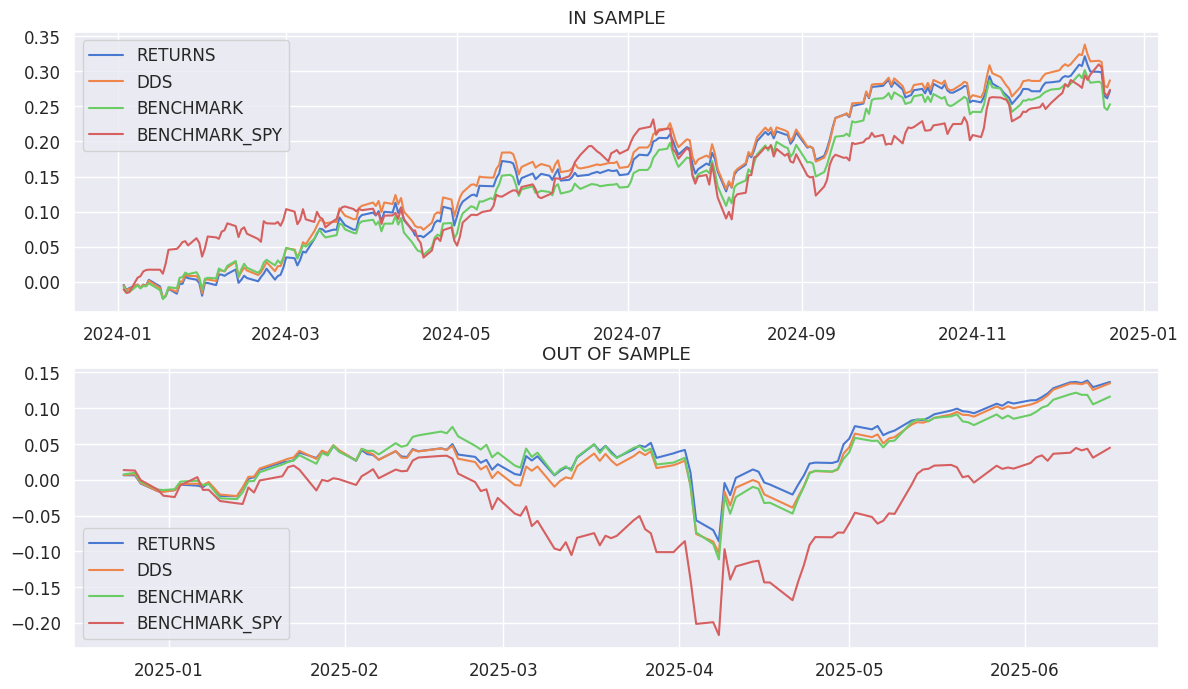

In [84]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(train.pct_change()[sel_return].mean(axis=1).cumsum(), label='RETURNS')
plt.plot(train.pct_change()[sel_dd].mean(axis=1).cumsum(), label='DDS')
plt.plot(train.pct_change().mean(axis=1).cumsum(), label='BENCHMARK')
plt.plot(train_cmp.pct_change().cumsum(), label='BENCHMARK_SPY')
plt.title('IN SAMPLE')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(test.pct_change()[sel_return].mean(axis=1).cumsum(), label='RETURNS')
plt.plot(test.pct_change()[sel_dd].mean(axis=1).cumsum(), label='DDS')
plt.plot(test.pct_change().mean(axis=1).cumsum(), label='BENCHMARK')
plt.plot(test_cmp.pct_change().cumsum(), label='BENCHMARK_SPY')
plt.title('OUT OF SAMPLE')
plt.legend()
plt.show()